In [18]:
import networkx as nx
import matplotlib.pyplot as plt
import datanetAPI

In [19]:
NUMBER_OF_SAMPLES=1

In [20]:
reader = datanetAPI.DatanetAPI('./dataset/gnnet-ch21-dataset-train',
            [], [])

In [21]:
it = iter(reader)
bandwidth_matrices = []
for i in range(NUMBER_OF_SAMPLES):
    sample = next(it)
    nodes = sample.topology_object.nodes
    bandwidth_matrix = [[0 for x in nodes] for y in nodes]
    for x in nodes:
        for y in nodes:
            if x == y:
                bandwidth_matrix[x][y] = 0
            else:
                x_object = sample.topology_object[x]
                if y not in x_object:
                    continue
                bandwidth = x_object[y][0]['bandwidth']
                if bandwidth == None:
                    bandwidth_matrix[x][y] = 0
                else:
                    bandwidth_matrix[x][y] = bandwidth

    bandwidth_matrices.append(bandwidth_matrix)
    
    

In [22]:
it = iter(reader)
node_matrices = []
for i in range(NUMBER_OF_SAMPLES):
    sample = next(it)
    nodes = sample.topology_object.nodes
    node_matrix = [[] for x in nodes]
    for x in nodes:
        x_object = sample.topology_object.nodes(data=True)[x]
        arr = [x_object['queueSizes'], x_object['schedulingPolicy'], x_object['levelsQoS']]
        if 'schedulingweights' in x_object:
            arr.append(x_object['schedulingweights'])
        
        node_matrix.append(arr)    

In [23]:
it = iter(reader)
global_matrices = []
for i in range(NUMBER_OF_SAMPLES):
    sample = next(it)
    nodes = sample.topology_object.nodes
    global_matrix = [[None for x in nodes] for y in nodes]
    for x in nodes:
        for y in nodes:
            tf = sample.traffic_matrix[x,y]
            if tf == None:
                continue
            flows = []
            for flow in tf['Flows']:
                flows.append([
                    flow['AvgBw'],
                    flow['PktsGen'],
                    flow['TotalPktsGen'],
                    flow['ToS']
                ])
            
            arr = [
                tf['AggInfo']['AvgBw'],
                tf['AggInfo']['PktsGen'],
                tf['AggInfo']['TotalPktsGen'],
                flows
            ]
            global_matrix[x][y] = arr

    global_matrices.append(global_matrix)
print(global_matrices)

[[[[0.0, 0.0, 0.0, []], [958.375, 0.957718, 14269.9982, [[958.375, 0.957718, 14269.9982, 0.0]]], [1121.61, 1.11221, 16571.929, [[1121.61, 1.11221, 16571.929, 0.0]]], [606.288, 0.606241, 9032.9909, [[606.288, 0.606241, 9032.9909, 0.0]]], [573.409, 0.578389, 8617.9961, [[573.409, 0.578389, 8617.9961, 0.0]]], [1152.46, 1.1502, 17137.98, [[1152.46, 1.1502, 17137.98, 0.0]]], [444.738, 0.442953, 6599.999699999999, [[444.738, 0.442953, 6599.999699999999, 0.0]]], [1035.6000000000001, 1.04195, 15525.054999999998, [[1035.6000000000001, 1.04195, 15525.054999999998, 0.0]]], [688.302, 0.684496, 10198.9904, [[688.302, 0.684496, 10198.9904, 0.0]]], [1203.12, 1.20101, 17895.049, [[1203.12, 1.20101, 17895.049, 0.0]]], [516.006, 0.521409, 7768.9941, [[516.006, 0.521409, 7768.9941, 0.0]]], [148.744, 0.147852, 2202.9948, [[148.744, 0.147852, 2202.9948, 0.0]]], [1228.6, 1.23644, 18422.956, [[1228.6, 1.23644, 18422.956, 0.0]]], [1134.8400000000001, 1.12812, 16808.988, [[1134.8400000000001, 1.12812, 16808.98

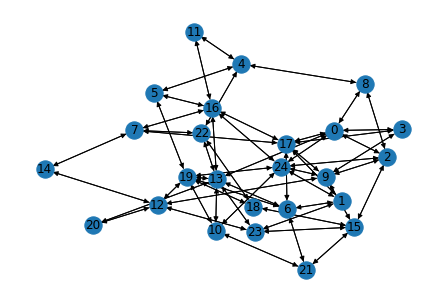

In [24]:
#physical topologies
for i in range(NUMBER_OF_SAMPLES):
    sample = next(it)
    G = sample.topology_object
    nx.draw(G, with_labels=True)
    plt.show()